# Parse TraceWin fieldmaps

**IN DEVELOPMENT**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
F = 'data/fields/beta063D_#43.edz'

In [3]:
!head {F}

  200          0.90000
   24         -0.04150          0.04150
   24         -0.04150          0.04150
        -1.00000
    -0.00000e+00
    -0.00000e+00
    -0.00000e+00
    -0.00000e+00
    -0.00000e+00
    -0.00000e+00


In [4]:
def parse_3d_fieldmap(file, check_shape=True):
    """
    
    From the TraceWin manual:
    
    The data is written as:
    - Dimension 3 :
    nz zmax
    nx xmin xmax
    ny ymin ymax
    Norm
    for k=0 to nz
        for j=0 to ny
            for i=0 to nx
                Fz(k*zmax/nz, 
                   ymin+j*(ymax-ymin)/ny, 
                   xmin+i*(xmax-xmin)/nx) 
                   
    The normalization factor is equal to ke/Norm or kb/Norm.                   
    Fz are in MV/m for electric field or in T for magnetic field.
    
    """
    
    # Read four header lines and cast
    with open(file) as f:
        line1 = f.readline().split()
        line2 = f.readline().split()
        line3 = f.readline().split()
        line4 = f.readline().split()
    nz, zmax= int(line1[0]), float(line1[1])
    nx, xmin, xmax = int(line2[0]), float(line2[1]), float(line2[2])
    ny, ymin, ymax = int(line3[0]), float(line3[1]), float(line3[2])
    norm = float(line4[0])
    
    # Grid spacings
    zmin = 0 
    dx = (xmax-xmin)/nx
    dy = (ymax-ymin)/ny
    dz = zmax/nz
    
    # Read flat data
    dat = np.loadtxt(file, skiprows=4)
    n = len(dat)
    assert (nx+1)*(ny+1)*(nz+1) == n, 'header sizes are inconsistent with the data'
    
    # Reshape 
    mesh3d = dat.reshape(nz+1, ny+1, nx+1)  
   
    
    if check_shape:
    # Check shape
        dat2 = []
        for k in range(nz+1):
            for j in range(ny+1):
                for i in range(nx+1):
                    dat2.append(mesh3d[k,j,i])
                    
        dat2 = np.array(dat2)
        assert np.allclose(dat, dat2)
    
    # put in x, y, z order
    mesh3d = np.transpose(mesh3d)
    
    # Attributes
    attrs = {}
    attrs['eleAnchorPt'] = 'beginning'
    attrs['gridGeometry'] = 'cartesian'
    attrs['axisLabels'] = ('x', 'y', 'z')
    attrs['gridLowerBound'] = (0, 0, 0)
    attrs['gridSize'] = (nx+1, ny+1, nz+1)        
    attrs['gridSpacing'] = (dx, dy, dz)  
    attrs['fieldScale'] = 1/norm
    
    # Set requested zmin
    attrs['gridOriginOffset'] = (xmin, ymin, zmin)     
                
    return attrs, mesh3d

attrs, d = parse_3d_fieldmap(F)   
attrs

{'eleAnchorPt': 'beginning',
 'gridGeometry': 'cartesian',
 'axisLabels': ('x', 'y', 'z'),
 'gridLowerBound': (0, 0, 0),
 'gridSize': (25, 25, 201),
 'gridSpacing': (0.0034583333333333337,
  0.0034583333333333337,
  0.0045000000000000005),
 'fieldScale': -1.0,
 'gridOriginOffset': (-0.0415, -0.0415, 0)}

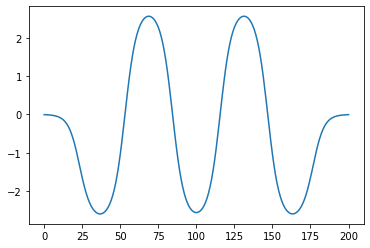

In [5]:
plt.plot(d[13,13,:])